In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Desktop/Data/adult.csv" , na_values = ["#NAME?"])

In [3]:
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
print(df['income'].value_counts())

<=50K    37155
>50K     11687
Name: income, dtype: int64


In [5]:
df['income'] = [0 if x == "<=50K" else 1 for x in df['income']]

In [6]:
df["income"].unique()

array([0, 1], dtype=int64)

In [7]:
X = df.drop('income' , 1)
y = df.income

In [8]:
X.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


In [9]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: income, dtype: int64

In [10]:
X["education"].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [11]:
print(pd.get_dummies(X["education"]).head())

   10th  11th  12th  1st-4th  5th-6th  7th-8th  9th  Assoc-acdm  Assoc-voc  \
0     0     1     0        0        0        0    0           0          0   
1     0     0     0        0        0        0    0           0          0   
2     0     0     0        0        0        0    0           1          0   
3     0     0     0        0        0        0    0           0          0   
4     0     0     0        0        0        0    0           0          0   

   Bachelors  Doctorate  HS-grad  Masters  Preschool  Prof-school  \
0          0          0        0        0          0            0   
1          0          0        1        0          0            0   
2          0          0        0        0          0            0   
3          0          0        0        0          0            0   
4          0          0        0        0          0            0   

   Some-college  
0             0  
1             0  
2             0  
3             1  
4             1  


In [12]:
for col_name in X.columns:
    if X[col_name].dtypes == "object":
        unique_cat = len(X[col_name].unique())
        print("Feature '{col_name}' has '{unique_cat}' unique categories".format(
        col_name=col_name, unique_cat=unique_cat))

Feature 'workclass' has '9' unique categories
Feature 'education' has '16' unique categories
Feature 'marital-status' has '7' unique categories
Feature 'occupation' has '15' unique categories
Feature 'relationship' has '6' unique categories
Feature 'race' has '5' unique categories
Feature 'gender' has '2' unique categories
Feature 'native-country' has '42' unique categories


In [13]:
print(X['native-country'].value_counts().sort_values(ascending = False).head(10))

United-States    43832
Mexico             951
?                  857
Philippines        295
Germany            206
Puerto-Rico        184
Canada             182
El-Salvador        155
India              151
Cuba               138
Name: native-country, dtype: int64


In [14]:
X['native-country'] = ['United-States' if x == 'United-States' else 'other' for x in X['native-country']]
print(X['native-country'].value_counts().sort_values(ascending = False))

United-States    43832
other             5010
Name: native-country, dtype: int64


In [15]:
todummy_list = ['workclass','education', 'marital-status','occupation', 'relationship',
               'race', 'gender','native-country']

In [16]:
def dummy_df (df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na = False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis = 1)
    return df
    

In [17]:
X = dummy_df (X, todummy_list)
X.head(10)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male,native-country_United-States,native-country_other
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
2,28,336951,12,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
3,44,160323,10,7688,0,40,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
4,18,103497,10,0,0,30,1,0,0,0,...,0,0,0,0,0,1,1,0,1,0
5,34,198693,6,0,0,30,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
6,29,227026,9,0,0,40,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0
7,63,104626,15,3103,0,32,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
8,24,369667,10,0,0,40,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
9,55,104996,4,0,0,10,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


In [18]:
X.isnull().sum().sort_values(ascending = False).head()

native-country_other    0
education_Bachelors     0
education_1st-4th       0
education_5th-6th       0
education_7th-8th       0
dtype: int64

In [19]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values = "NaN", strategy = "median", axis = 0)
imp.fit(X)
X = pd.DataFrame(data=imp.transform(X), columns=X.columns)

In [20]:
def find_outliere_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    IQR = q3 - q1
    floor = q1 - 1.5*IQR
    ceiling = q3 + 1.5*IQR
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    
    return outlier_indices, outlier_values

In [21]:
tukey_indices, tukey_values = find_outliere_tukey(X["age"])
print(np.sort(tukey_values))

[79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79.
 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 80. 80. 80. 80. 80. 80.
 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80.
 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 81. 81. 81. 81.
 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81.
 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 82. 82. 82.
 82. 82. 82. 82. 82. 82. 82. 82. 82. 82. 82. 82. 83. 83. 83. 83. 83. 83.
 83. 83. 83. 83. 83. 84. 84. 84. 84. 84. 84. 84. 84. 84. 84. 84. 84. 84.
 85. 85. 85. 85. 85. 86. 87. 87. 87. 88. 88. 88. 88. 88. 88. 89. 89. 90.
 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90.
 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90.
 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90.]


In [26]:
from sklearn.preprocessing import scale
from statsmodels.nonparametric.kde import KDEUnivariate

def find_outliers_kde(x):
    x_scaled = scale(list(map(float, x)))
    kde = KDEUnivariate(x_scaled)
    kde.fit(bw = "scott", fft = True)
    pred = kde.evaluate(x_scaled)
    
    n = sum(pred < 0.05)
    outlier_ind = np.asarray(pred).argsort()[:n]
    outlier_value = np.asarray(x)[outlier_ind]
    
    return outlier_ind, outlier_value

In [27]:
kde_indices, kde_values = find_outliers_kde(X["age"])
print((np.sort(kde_values)))

MemoryError: 

In [22]:
%matplotlib inline 
import matplotlib.pyplot as plt

def plot_histogram(x):
    plt.hist(x , color = "gray", alpha = 0.5)
    plt.title("Histogram of '{var_name}'".format(var_name = x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

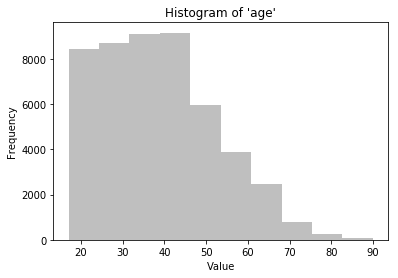

In [23]:
plot_histogram(X["age"])

In [24]:
def plot_histogram_dv(x,y):
    plt.hist(list(x[y==0]), alpha = 0.5, label = "DV=0")
    plt.hist(list(x[y==1]), alpha = 0.5, label = "DV=1")
    plt.title("Histogram of '{var_name}' by DV Category".format(var_name = x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc = "upper right")
    plt.show()

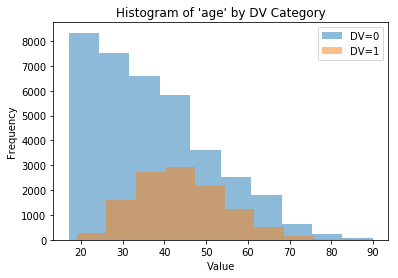

In [25]:
plot_histogram_dv(X["age"],y)

In [26]:
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(df):
    combos = list(combinations(list(df.columns), 2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]
    
    poly = PolynomialFeatures(interaction_only= True, include_bias = False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    noint_indicies = [i for i, x in enumerate(list((df == 0).all())) if x]
    df = df.drop(df.columns[noint_indicies], axis = 1)
    
    return df

In [27]:
X = add_interactions(X)
print(X.head(5))

    age    fnlwgt  educational-num  capital-gain  capital-loss  \
0  25.0  226802.0              7.0           0.0           0.0   
1  38.0   89814.0              9.0           0.0           0.0   
2  28.0  336951.0             12.0           0.0           0.0   
3  44.0  160323.0             10.0        7688.0           0.0   
4  18.0  103497.0             10.0           0.0           0.0   

   hours-per-week  workclass_?  workclass_Federal-gov  workclass_Local-gov  \
0            40.0          0.0                    0.0                  0.0   
1            50.0          0.0                    0.0                  0.0   
2            40.0          0.0                    0.0                  1.0   
3            40.0          0.0                    0.0                  0.0   
4            30.0          1.0                    0.0                  0.0   

   workclass_Never-worked                ...                 \
0                     0.0                ...                  
1       

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
X_pca = pd.DataFrame(pca.fit_transform(X))
print(X_pca.head(5))

              0             1             2             3             4  \
0 -2.017217e+08 -1.667885e+07  1.873905e+05 -2.091049e+06 -3.544552e+05   
1 -2.017239e+08 -1.672363e+07 -4.771779e+06 -6.290287e+05 -3.632957e+05   
2 -2.017189e+08 -1.662251e+07  6.289177e+06 -2.365242e+06  1.158349e+06   
3  1.030840e+09 -1.504992e+07 -1.372122e+06  7.329805e+05 -1.450348e+05   
4 -2.017248e+08 -1.674194e+07 -6.785342e+06 -8.440193e+05  1.839778e+05   

              5              6              7             8             9  
0  24953.578299  103135.788193 -187432.549491 -64861.336889  69955.761999  
1  40006.136738  -95078.463151    -933.724736  34053.700491  39935.739071  
2 -46306.506627 -436786.744730  133282.627039 -11806.404681  18550.281706  
3 -85369.487090 -120519.283078   -2678.433584  26677.315411  -6015.806842  
4  37700.998404   59157.251642   34897.823695  -5328.670018 -73623.035882  


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, random_state = 1)

C:\ANACONDA\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [30]:
print(df.shape)
print(X.shape)

(48842, 15)
(48842, 1891)


In [31]:
import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest(k = 20)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices = True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

C:\ANACONDA\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [ 350  663  824  829  835  992 1127 1164 1208 1315 1324 1327 1437 1628
 1632] are constant.
  UserWarning)
C:\ANACONDA\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [32]:
colnames_selected

['educational-num',
 'marital-status_Married-civ-spouse',
 'relationship_Husband',
 'age_educational-num',
 'age_marital-status_Married-civ-spouse',
 'age_relationship_Husband',
 'fnlwgt_marital-status_Married-civ-spouse',
 'fnlwgt_relationship_Husband',
 'educational-num_hours-per-week',
 'educational-num_marital-status_Married-civ-spouse',
 'educational-num_relationship_Husband',
 'hours-per-week_marital-status_Married-civ-spouse',
 'hours-per-week_relationship_Husband',
 'marital-status_Married-civ-spouse_relationship_Husband',
 'marital-status_Married-civ-spouse_race_White',
 'marital-status_Married-civ-spouse_gender_Male',
 'marital-status_Married-civ-spouse_native-country_United-States',
 'relationship_Husband_race_White',
 'relationship_Husband_gender_Male',
 'relationship_Husband_native-country_United-States']

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

def find_model_perf(X_train, y_train, X_test, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_hat = [x[1] for x in model.predict_proba(X_test)]
    auc = roc_auc_score(y_test, y_hat)
   
    return auc

In [34]:
auc_processed = find_model_perf(X_train_selected, y_train, X_test_selected, y_test)
print(auc_processed)

0.8396401995832425


In [39]:
df_unprocessed = df
df_unprocessed = df_unprocessed.dropna(axis = 0, how = 'any')
print(df.shape)
print(df_unprocessed.shape)

(48842, 15)
(48842, 15)


In [40]:
for col_name in df_unprocessed.columns:
    if df_unprocessed[col_name].dtypes not in ['int32', 'int64', 'float32', 'float64']:
        df_unprocessed = df_unprocessed.drop(col_name, 1)

In [41]:
X_unprocessed = df_unprocessed.drop('income', 1)
y_unprocessed = df_unprocessed.income

In [42]:
print(X_unprocessed.head(5))

   age  fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week
0   25  226802                7             0             0              40
1   38   89814                9             0             0              50
2   28  336951               12             0             0              40
3   44  160323               10          7688             0              40
4   18  103497               10             0             0              30


In [43]:
X_train_unprocessed, X_test_unprocessed, y_train, y_test = train_test_split(
    X_unprocessed, y_unprocessed, train_size = 0.70, random_state = 1)

In [44]:
auc_unprocessed = find_model_perf(X_train_unprocessed, y_train, X_test_unprocessed, y_test)
print(auc_unprocessed)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5815976108525269


In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [46]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# The function to measure the quality of a split
criterion = ['gini' , 'entropy']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [47]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = 
                               random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train_selected, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 38.7min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [48]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'entropy',
 'bootstrap': True}

In [49]:
rf_predict = rf_random.predict(X_test_selected)

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
best_random = rf_random.best_estimator_
rf_cv_score = cross_val_score(best_random, X_test_selected, y_test, cv=10, scoring='roc_auc')

In [54]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rf_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rf_predict))
print('\n')
print("=== All AUC Scores ===")
print(rf_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rf_cv_score.mean())

=== Confusion Matrix ===
[[10320   792]
 [ 1660  1881]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     11112
           1       0.70      0.53      0.61      3541

    accuracy                           0.83     14653
   macro avg       0.78      0.73      0.75     14653
weighted avg       0.82      0.83      0.82     14653



=== All AUC Scores ===
[0.86607559 0.88870006 0.87325766 0.87307078 0.88185302 0.88210601
 0.88769979 0.88378668 0.87588293 0.88186573]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.87942982434631


In [55]:
best_random

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_selected, y_train)